# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('us_births_2016_2021.csv')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [14]:
# display first 5 rows
df.head(5)


,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [15]:
# get overall info about data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


In [5]:
#look at number of rows and columns... table has 22 columns and 208 rows
df.shape

(5496, 9)

In [6]:
#count number of rows.
df.count()

State                            5496
State Abbreviation               5496
Year                             5496
Gender                           5496
Education Level of Mother        5496
Education Level Code             5496
Number of Births                 5496
Average Age of Mother (years)    5496
Average Birth Weight (g)         5496
dtype: int64

In [9]:
#check null values.
df.isnull().sum()

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [10]:
df.describe()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000,5496.000000,5496.000000,5496.000000
mean,2018.500728,3.026201,4115.443959,29.552274,3250.887627
std,1.707554,4.733406,6687.036797,2.779735,114.456090
min,2016.000000,-9.000000,10.000000,23.100000,2451.900000
25%,2017.000000,2.000000,559.000000,27.500000,3182.200000
50%,2019.000000,4.000000,1692.000000,29.600000,3256.000000
75%,2020.000000,6.000000,5140.000000,31.800000,3330.825000
max,2021.000000,8.000000,59967.000000,35.500000,3585.700000


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: title={'center': 'Total number of births group by gender'}, xlabel='Gender', ylabel='Number of Births'>

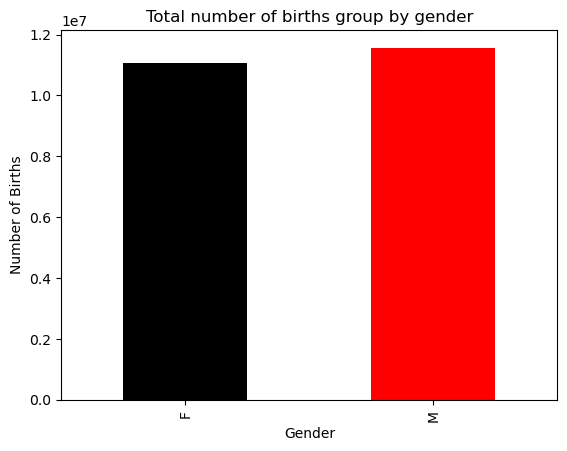

In [18]:
# comparing the total number of births by gender
df1 = df.groupby(['Gender'])
df1['Number of Births'].agg('sum').plot.bar(x='Gender', ylabel='Number of Births', title='Total number of births group by gender', color=['black', 'red'])

<Axes: title={'center': 'Total number of births group by year and gender'}, xlabel='Year,Gender', ylabel='Number of Births'>

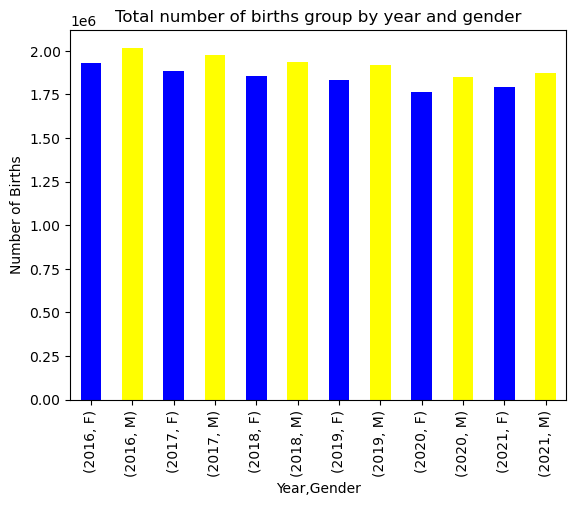

In [21]:
# Groupby for number of births with the total number of birth group by year and gender of babies.
df2 = df.groupby(['Year', 'Gender'])
df2['Number of Births'].agg('sum').plot.bar(x='Gender', ylabel='Number of Births', title='Total number of births group by year and gender', color=['blue', 'yellow'])

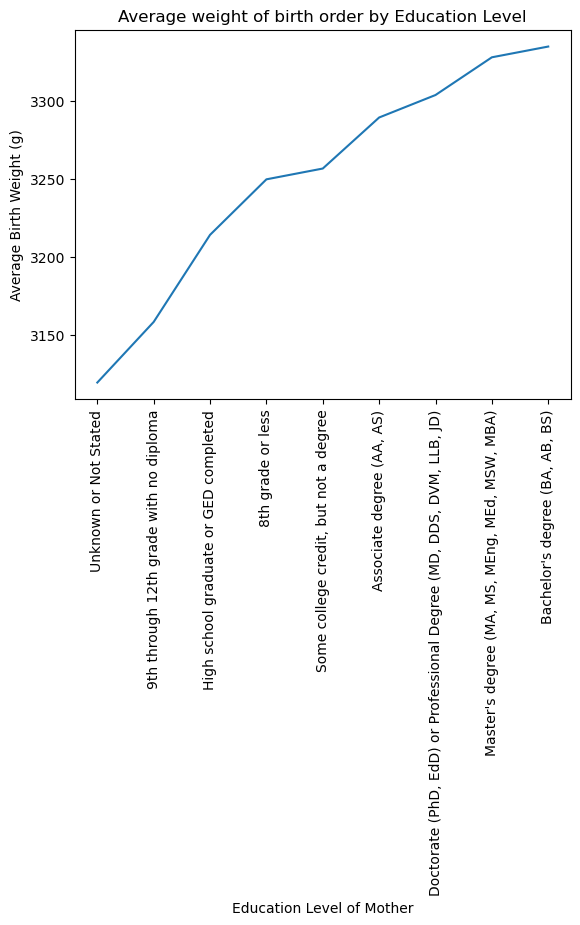

In [34]:
# Checking through diagram Education level of mother with average birth weight of the baby.
# It shows baby weight increases if mother education level goes higher level 
df3 = df.groupby('Education Level of Mother')['Average Birth Weight (g)'].agg('mean').sort_values()
plt.xticks(rotation=90)
plt.title('Average weight of birth order by Education Level')
plt.xlabel('Education Level of Mother')
plt.ylabel('Average Birth Weight (g)')
plt.plot(df3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Montana'),
  Text(27, 0, 'Nebraska'),
  Text(28, 0, 'Neva

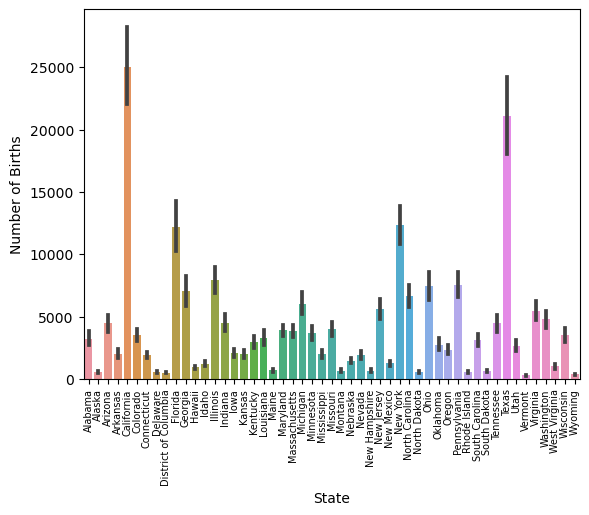

In [36]:
# visualising number of births with the states through seaborn diagram
sns.barplot(x = 'State', y = "Number of Births", data = df)
plt.xticks(rotation = 'vertical', fontsize = 7)


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
   Yes,Education level of mothers have increased the birth weight of the babies.
2. Do you have any concerns about your dataset?
   No,I dont have any concerns in my dataset.I never see any correction needed in future.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
   No,I never see any null values and duplicates in my dataset,So there is no need for cleaning the data.